In [1]:
# Name :        Compare Algorithm's Confidence Level to its Performance
# Description : The script test whether conversation transcripts confidence is correlated with their accuracy
#               and visualize this correlation
# Arguments :   A json file of the transcript with confidence level
#               A txt file of the real transcript
# Returning :   None
# Author :      Yonathan Guttel <yesguttel@gmail.com
# Date :        13.02.2018
# Version :     1.0.1


In [2]:
# Set WD (change it accordingly to where your files are located)
%cd # your path#

F:\Guttel\Desktop\To delete on june 2018 (check if everything is backed up)\Gong\Confidence_Accuracy


In [5]:
# Import needed libraries
import pandas as pd
import json
import requests
import difflib
import numpy as np
import seaborn as sns; sns.set(color_codes=True)
from scipy import stats
from IPython.core.display import display, HTML
# Import external functions
from confidence_accuracy_functions import element_json_extractor, text_levenshtein_distance, accuracy_confidence_correlation, html_displayer
%load_ext autoreload
#%reload_ext autoreload
%autoreload 2 magic
%matplotlib inline 

In [6]:
#run the script
#if __name__ == "__main__": # for other IDE

In [7]:
####################### Set parameters ######################
# minimum number of occurances for a confidence level in order to be included in the analysis
TH_min_num= 5 
#should extra visulation features be presnted
extra_vis =True
# Set low confidence level for the HTML part
TH_low_conf =0.9
#set if to display red backgrounf for low confidence words in html display
TH_highligh_low=True

In [8]:
# Upload data
predicted_json_data = json.load(open("9149298224668811_capio_transcript.json"))
true_data= open("9149298224668811_true_transcript.txt", "r").read().rstrip().split()

In [9]:
# Extract words and conf level
words_list = element_json_extractor (predicted_json_data, 'word')
confidence_list = element_json_extractor (predicted_json_data, 'confidence')

In [10]:
# Write transcript to file
with open('predicted_transcript.txt', mode="w") as outfile: 
    for word in words_list:
        outfile.write("%s\n" % word)

In [11]:
# Computing the Levenshtein distance (the minimal edit distance) between the predicted and true transcripts
compare_list=text_levenshtein_distance (words_list,true_data)

In [12]:
# Create a df for confidence and acuracy
results = accuracy_confidence_correlation(compare_list,confidence_list,TH_min_num=TH_min_num)

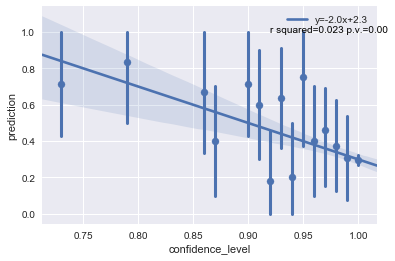

In [13]:
# Visualization

slope, intercept, r_value, p_value, std_err = stats.linregress((results[['confidence_level']].iloc[:,0]),(results[['prediction']].iloc[:,0]))

ax = sns.regplot(x='confidence_level', y='prediction', data=results, x_estimator=np.mean, x_ci='ci',
                line_kws={'label':"y={0:.1f}x+{1:.1f}".format(slope,intercept)})
ax.legend()

# if you wish to display the r squared and p.v.
if  extra_vis==True:
    ax.text(0.92,1, "r squared={0:.3f} p.v.={1:.2f}".format(r_value**2,p_value),
        size='medium', color='black')

In [14]:
# Display text as HTML and highlight in red low confidence words V1
html_displayer(words_list,confidence_list,TH_highligh_low,TH_low_conf)


In [15]:
# non function way - Display text as HTML that highlight in red low confidence words V2
for lines, conf in zip(words_list,confidence_list):
        if conf<TH_low_conf:
            display(HTML('<h4 style=\"background-color:red;\">' +lines+ '</h4>'))
        else:
            display(HTML('<h4>' +lines+ '</h4>'))